# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [111]:
# import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [112]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv') 

## Part 2: Exploratory Data Analysis.

* ### Info

In [113]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [114]:
# preview of the first 5 lines of the loaded data 
dataset.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [115]:
# preview of the first 5 lines of the loaded data 
dataset.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4878,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,8
4879,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,7
4880,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,7
4881,6.0,0.200,0.33,1.1,0.039,45.0,126.0,0.99051,3.31,0.45,11.60,7
4882,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,7
4883,5.8,0.280,0.34,2.2,0.037,24.0,125.0,0.98986,3.36,0.33,12.80,8
4884,6.4,0.310,0.50,5.8,0.038,42.0,111.0,0.99189,3.18,0.53,11.90,7
4885,5.1,0.260,0.33,1.1,0.027,46.0,113.0,0.98946,3.35,0.43,11.40,7
4886,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.70,7
4887,6.5,0.280,0.34,4.6,0.054,22.0,130.0,0.99193,3.20,0.46,12.00,7


* ### Describe

In [116]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [117]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset['quality'] = dataset.quality.apply(lambda q: 0 if q <= 6 else 1)

In [118]:
# preview of the first 5 lines of the loaded data 
dataset.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [119]:
dataset.tail(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4878,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.80,1
4879,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,1
4880,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,1
4881,6.0,0.200,0.33,1.1,0.039,45.0,126.0,0.99051,3.31,0.45,11.60,1
4882,6.4,0.105,0.29,1.1,0.035,44.0,140.0,0.99142,3.17,0.55,10.70,1
4883,5.8,0.280,0.34,2.2,0.037,24.0,125.0,0.98986,3.36,0.33,12.80,1
4884,6.4,0.310,0.50,5.8,0.038,42.0,111.0,0.99189,3.18,0.53,11.90,1
4885,5.1,0.260,0.33,1.1,0.027,46.0,113.0,0.98946,3.35,0.43,11.40,1
4886,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.70,1
4887,6.5,0.280,0.34,4.6,0.054,22.0,130.0,0.99193,3.20,0.46,12.00,1


* ### 'quality' attribute value counts and visualisation

In [120]:
print('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

dataset['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

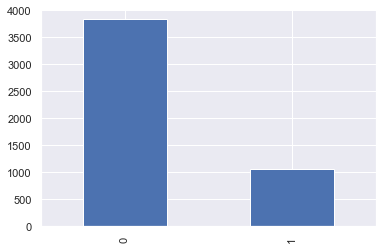

In [121]:
# visualisation plot
dataset['quality'].value_counts().plot(x = dataset['quality'], kind='bar')

* ### Resampling of an imbalanced dataset

In [122]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

* ### Random under-sampling of an imbalanced dataset

In [123]:
#class_0_under = class_0.sample(count_class_1)
#dataset_under = pd.concat([class_0_under, class_1], axis=0)

#print('Random under-sampling:')
#print(dataset_under.quality.value_counts())

#dataset_under.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Random over-sampling of an imbalanced dataset

Random over-sampling:
1    3838
0    3838
Name: quality, dtype: int64


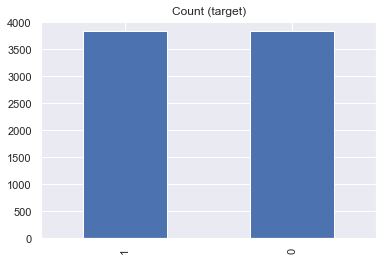

In [124]:
class_1_over = class_1.sample(count_class_0, replace=True)
dataset_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(dataset_over.quality.value_counts())

dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [125]:
# initialisation of target
#target = dataset['quality']

# for under-sampling dataset
#target_under = dataset_under['quality']

# for over-sampling dataset
target_over = dataset_over['quality'] 

* ### Drop column 'quality'

In [126]:
#dataset = dataset.drop(columns=['quality'])

# for under-sampling dataset
#dataset_under = dataset_under.drop(columns=['quality'])

# for over-sampling dataset
dataset_over = dataset_over.drop(columns=['quality'])

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [127]:
# StandardScaler 
sc = StandardScaler()

#dataset_sc = sc.fit_transform(dataset)

# for under-sampling dataset
#dataset_sc = sc.fit_transform(dataset_under)

# for over-sampling dataset
dataset_sc = sc.fit_transform(dataset_over)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.233927,-0.036556,0.273941,3.025998,0.103421,0.629490,0.910046,2.495791,-1.281018,-0.351129,-1.546288
1,-0.624166,0.269779,0.088282,-0.922831,0.312967,-1.327166,-0.052713,0.175045,0.668278,-0.021503,-1.016341
2,1.582359,0.065556,0.645258,0.172917,0.365353,-0.317279,-0.939465,0.539734,0.408372,-0.433535,-0.562101
3,0.479096,-0.445003,-0.097376,0.503709,0.784444,0.755725,1.315419,0.705502,-0.046464,-0.763160,-0.713514
4,0.479096,-0.445003,-0.097376,0.503709,0.784444,0.755725,1.315419,0.705502,-0.046464,-0.763160,-0.713514


* ### Creating datasets for ML part

In [128]:
# set 'X' for features' and y' for the target ('quality').
#y = target
#X = dataset_sc.copy()

# for under-sampling dataset 
#y = target_under
#X = dataset_sc.copy()

# for over-sampling dataset 
y = target_over
X = dataset_sc.copy()

In [129]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.233927,-0.036556,0.273941,3.025998,0.103421,0.629490,0.910046,2.495791,-1.281018,-0.351129,-1.546288
1,-0.624166,0.269779,0.088282,-0.922831,0.312967,-1.327166,-0.052713,0.175045,0.668278,-0.021503,-1.016341
2,1.582359,0.065556,0.645258,0.172917,0.365353,-0.317279,-0.939465,0.539734,0.408372,-0.433535,-0.562101
3,0.479096,-0.445003,-0.097376,0.503709,0.784444,0.755725,1.315419,0.705502,-0.046464,-0.763160,-0.713514
4,0.479096,-0.445003,-0.097376,0.503709,0.784444,0.755725,1.315419,0.705502,-0.046464,-0.763160,-0.713514


* ### 'Train\Test' split

In [130]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [132]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [133]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [134]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.732782  0.694517  0.713137       766
           1   0.711111  0.748052  0.729114       770

    accuracy                       0.721354      1536
   macro avg   0.721947  0.721284  0.721125      1536
weighted avg   0.721919  0.721354  0.721146      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.905426  0.762402  0.827782       766
           1   0.795735  0.920779  0.853703       770

    accuracy                       0.841797      1536
   macro avg   0.850581  0.841591  0.840742      1536
weighted avg   0.850438  0.841797  0.840776      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.978198  0.878590  0.925722       766
           1   0.890330  0.980519  0.933251       770

    accuracy                       0.929688      1536
   macro avg   0.934264  0.929555  0.929487

* ### Confusion matrix

In [135]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[532 234]
 [194 576]]

KNN Confusion Matrix: 
 [[584 182]
 [ 61 709]]

DT Confusion Matrix: 
 [[673  93]
 [ 15 755]]



* ### ROC-AUC score

In [136]:
roc_auc_score(DT_pred, y_test)

0.934263931548925

* ### Build, train and evaluate models with hyperparameters

In [137]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [138]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 1, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters:          {'criterion': 'entropy', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [139]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.732414  0.693211  0.712274       766
           1   0.710234  0.748052  0.728653       770

    accuracy                       0.720703      1536
   macro avg   0.721324  0.720632  0.720463      1536
weighted avg   0.721295  0.720703  0.720485      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.905426  0.762402  0.827782       766
           1   0.795735  0.920779  0.853703       770

    accuracy                       0.841797      1536
   macro avg   0.850581  0.841591  0.840742      1536
weighted avg   0.850438  0.841797  0.840776      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.973529  0.864230  0.915629       766
           1   0.878505  0.976623  0.924969       770

    accuracy                       0.920573      1536
   macro avg   0.926017  0.920427  0.920299

* ### Confusion matrix

DT Confusion Matrix


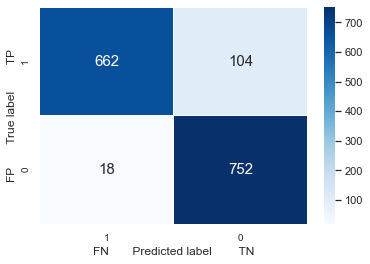

In [140]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

In [141]:
LR1_confusion_mx = confusion_matrix(y_test, LR1_pred)
print("LR Confusion Matrix: \n", LR1_confusion_mx)
print()
KNN1_confusion_mx = confusion_matrix(y_test, KNN1_pred)
print("KNN Confusion Matrix: \n", KNN1_confusion_mx)
print()
DT1_confusion_mx = confusion_matrix(y_test, DT1_pred)
print("DT Confusion Matrix: \n", DT1_confusion_mx)
print()

LR Confusion Matrix: 
 [[531 235]
 [194 576]]

KNN Confusion Matrix: 
 [[584 182]
 [ 61 709]]

DT Confusion Matrix: 
 [[662 104]
 [ 18 752]]



* ### ROC-AUC score

In [142]:
roc_auc_score(DT1_pred, y_test)

0.926017042330951

##  Conclusion.

In [143]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTest.csv', index=False)